# 6.4 Supervised Machine Learning: Regression

### 1. Import libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensures the charts are displayed in the notebook

%matplotlib inline

In [3]:
# Define path

path = r'/Users/lucerovargas/Documents/Data Analysis/Data Immersion/Achievement 6- Sourcing Open Data'

In [4]:
# Import cleaned data set 

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Data_clean2.csv'), index_col = False)

In [5]:
df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_characteristics,location_description,n_guns_involved,notes,participant_age,participant_gender,participant_relationship,participant_status,participant_type,sources
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,1.0,Julian Sims under investigation: Four Shot and...,0::20,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,1.0,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Cotton Club,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,"Shot - Dead (murder, accidental, suicide)||Off...",NaN,1.0,NaN,0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...


In [7]:
# Remove unnamed column

df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.shape

(142390, 19)

### 2. Data cleaning

Data was cleaned in the previous exercise

### 3. Explore your data visually, looking for variables whose relationship you'd like to test

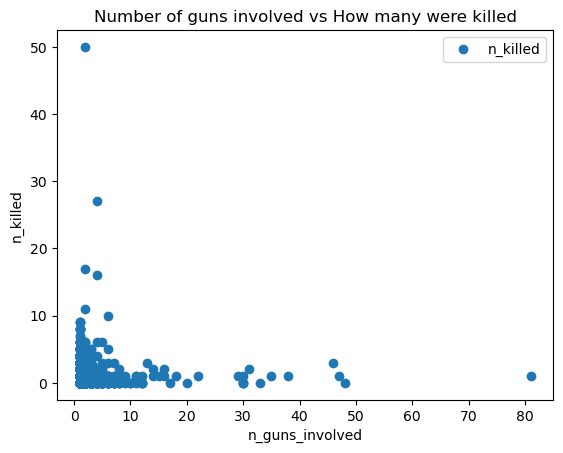

In [11]:
# Create a scatterplot using matplotlib for how 'n_killed' and 'n_guns' plot against each other

df.plot(x = 'n_guns_involved', y='n_killed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of guns involved vs How many were killed')  
plt.xlabel('n_guns_involved')  
plt.ylabel('n_killed')  
plt.show()

In [13]:
df['n_killed'].value_counts(dropna = False)

0     88548
1     48436
2      4604
3       595
4       139
5        41
6        11
8         5
9         3
7         2
11        1
10        1
16        1
50        1
27        1
17        1
Name: n_killed, dtype: int64

### 4. State your hypothsesis

As the number of guns involved increases, the number of deaths increases as well

### 5. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['n_guns_involved'].values.reshape(-1,1)
y = df['n_killed'].values.reshape(-1,1)

In [16]:
X

array([[1.],
       [1.],
       [2.],
       ...,
       [1.],
       [1.],
       [2.]])

In [17]:
y

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [2]])

### 6. Split the data into two sets: a training set and a test set

In [18]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 7. Run a linear regression on the data

In [19]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [20]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

### 8. Create a plot that shows the regression line on the test set

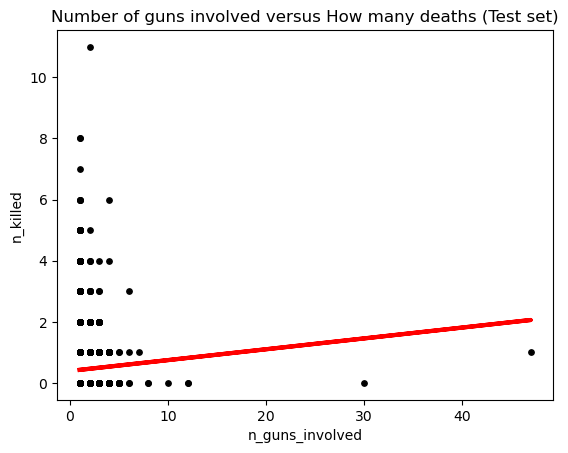

In [24]:
# Create a plot that shows the regression line on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of guns involved versus How many deaths (Test set)')
plot_test.xlabel('n_guns_involved')
plot_test.ylabel('n_killed')
plot_test.show()

The line does not not appear to fit the data well, the points are scattered and there is an outlier with n_killed over 10 and for the n_guns_involved over 20.

### 9. Check the model performance statistics- MSE and R2 score

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03548819]]
Mean squared error:  0.36572098957274346
R2 score:  0.00041375988029934696


In [27]:
y_predicted

array([[0.42284649],
       [0.42284649],
       [0.42284649],
       ...,
       [0.42284649],
       [0.42284649],
       [0.42284649]])

In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,0.422846
1,1,0.422846
2,0,0.422846
3,1,0.422846
4,1,0.422846
5,1,0.422846
6,0,0.422846
7,0,0.422846
8,0,0.422846
9,0,0.422846


The mean squared error is at 0.37, this means that it may not be the best model to represent this data. It is not a good fit and the dataframe that reflects the actual versus the predicted confirms this information. The R2 squared value is at 0.00041, since it is closer to 0 it also confirms it is not a good fit. I can safely say my hypothesis is not correct, the number of guns involved does not increase the number of deaths.